In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Random but reproducible
np.random.seed(42)

# Features: size, rooms, distance, age
m = 100  # number of examples
size = np.random.uniform(500, 3500, m)         # in sqft
rooms = np.random.randint(1, 6, m)             # number of rooms
distance = np.random.uniform(1, 20, m)         # distance to city center
age = np.random.uniform(0, 30, m)              # house age

# Stack features together into a single array
X = np.column_stack((size, rooms, distance, age))

# Target (price) = some weighted sum of features + noise
y = 50 * size + 10000 * rooms - 2000 * distance - 1000 * age + np.random.randn(m) * 10000


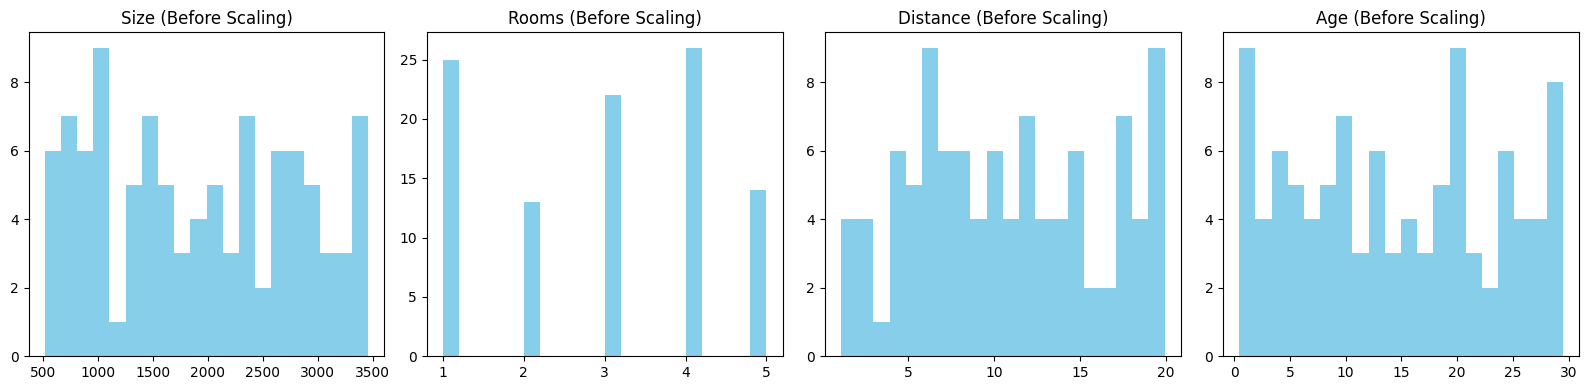

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
features = ['Size', 'Rooms', 'Distance', 'Age']

for i in range(4):
    axes[i].hist(X[:, i], bins=20, color='skyblue')
    axes[i].set_title(f'{features[i]} (Before Scaling)')
plt.tight_layout()
plt.show()


In [4]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit & transform data
X_minmax = minmax_scaler.fit_transform(X)
X_standard = standard_scaler.fit_transform(X)


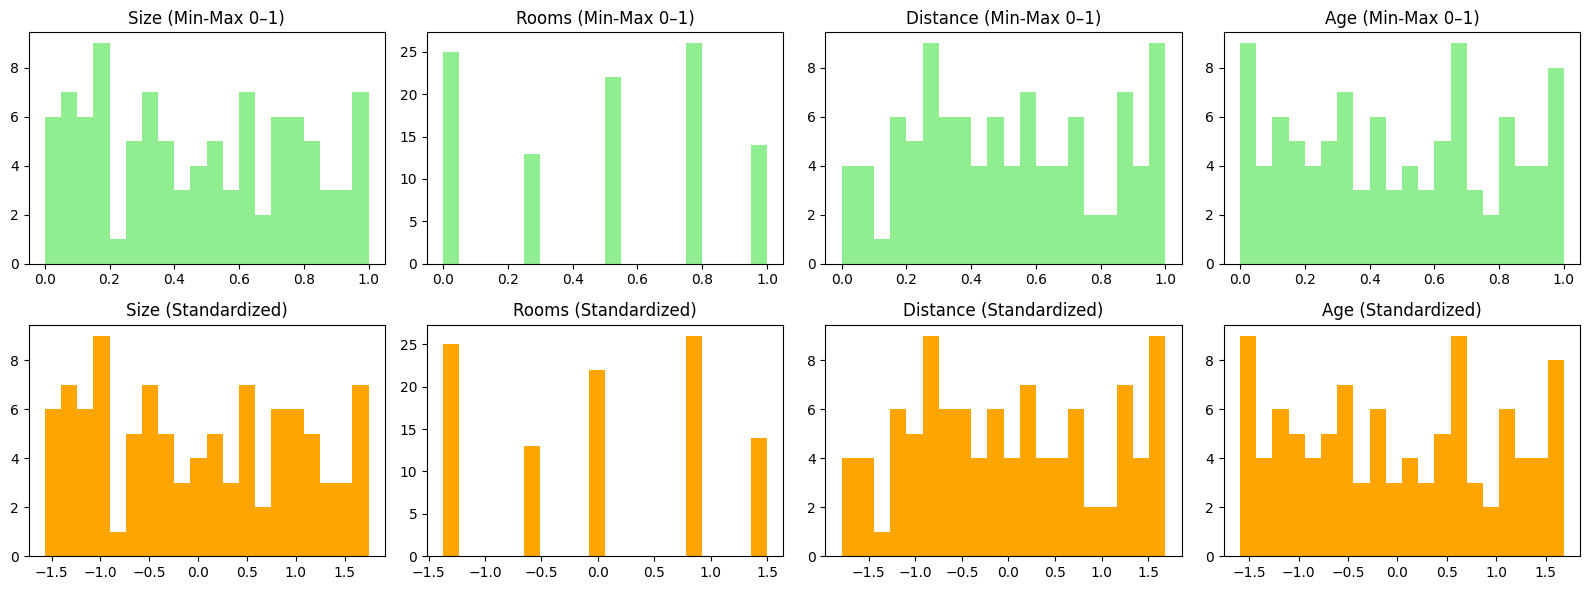

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Top row: Min-Max Scaling
for i in range(4):
    axes[0, i].hist(X_minmax[:, i], bins=20, color='lightgreen')
    axes[0, i].set_title(f'{features[i]} (Min-Max 0–1)')

# Bottom row: Standardization
for i in range(4):
    axes[1, i].hist(X_standard[:, i], bins=20, color='orange')
    axes[1, i].set_title(f'{features[i]} (Standardized)')
    
plt.tight_layout()
plt.show()


In [6]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = X @ w + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = X @ w + b
    dj_dw = (1 / m) * (X.T @ (predictions - y))
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history


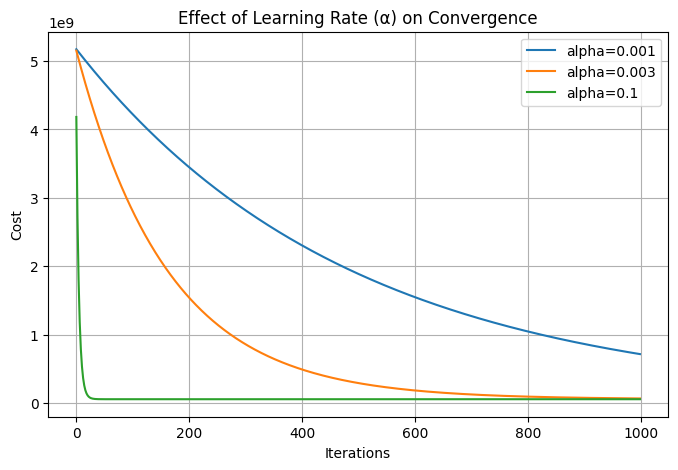

In [10]:
alphas = [0.001, 0.003, 1e-1]
iterations = 1000
initial_w = np.zeros(X_standard.shape[1])
initial_b = 0

plt.figure(figsize=(8, 5))

for alpha in alphas:
    w, b, cost_history = gradient_descent(X_standard, y, initial_w.copy(), initial_b, alpha, iterations)
    plt.plot(range(iterations), cost_history, label=f'alpha={alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Effect of Learning Rate (α) on Convergence')
plt.legend()
plt.grid(True)
plt.show()
